#exercise5

The code imports necessary libraries such as NumPy, Pandas, and Scikit-Learn, as well as the Diabetes dataset from Scikit-Learn.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split



the random seed is set to 42 to ensure reproducibility of results.
The Diabetes dataset is loaded, and the input features are stored in X, while the target variable is stored in y.

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Load Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target




The dataset is split into training and testing sets, with 20% of the data allocated to the testing set.

In [3]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



A custom implementation of Linear Regression model with Mean Absolute Error as the cost function is defined. This is done in a class named LinearRegressionMAE, which has methods to fit the model to the training data, make predictions on the testing data, and compute the Mean Absolute Error of the model's predictions.

The fit method of LinearRegressionMAE initializes the weights and bias to zero, and then iteratively updates the weights and bias using the gradient descent algorithm until convergence. The cost function used is the Mean Absolute Error, and the gradient is computed using the sign of the difference between the true target value and the predicted target value.
The predict method of LinearRegressionMAE computes the predicted target values given input features, using the learned weights and bias.

In [13]:
# Define Linear Regression model with Mean Absolute Error as cost function
class LinearRegressionMAE:
    
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
         # Gradient descent
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            error = y - y_pred
            mae_gradient = np.where(error>0, -1, 1)
            self.weights -= self.lr * (1/n_samples) * np.dot(X.T, mae_gradient * error)
            self.bias -= self.lr * (1/n_samples) * np.sum(mae_gradient * error)
    
    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred
        
       

The model is trained using the fit method of LinearRegressionMAE with a learning rate of 0.0001 and 10,000 iterations.
The model makes predictions on the testing set using the predict method of LinearRegressionMAE.

In [14]:
# Train model and compute predictions for testing set
model = LinearRegressionMAE(lr=0.0001, n_iters=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



The Mean Absolute Error of the custom implementation is computed using the np.mean and np.abs functions.

In [15]:
# Compute Mean Absolute Error for custom implementation
mae = np.mean(np.abs(y_test - y_pred))
print("Mean Absolute Error:", mae)



Mean Absolute Error: 64.69002554179588


The Scikit-Learn implementation of Linear Regression model is also trained using the LinearRegression class from Scikit-Learn.

The Scikit-Learn model makes predictions on the testing set using the predict method of the LinearRegression class.The Mean Absolute Error of the Scikit-Learn implementation is computed using the np.mean and np.abs functions.

The Mean Absolute Error of Scikit-Learn implementationare printed to the console for comparison.

In [16]:
# Compare with Scikit-Learn's Linear Regression model
from sklearn.linear_model import LinearRegression
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict(X_test)

mae_sklearn = np.mean(np.abs(y_test - y_pred_sklearn))
print("Mean Absolute Error (Scikit-Learn):", mae_sklearn)

Mean Absolute Error (Scikit-Learn): 42.79409467959994


#exercise6

In [29]:
import numpy as np
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()

# Split the dataset into training and testing sets
X_train = diabetes.data[:-20]
y_train = diabetes.target[:-20]
X_test = diabetes.data[-20:]
y_test = diabetes.target[-20:]

# Add a column of ones to the input data to account for the bias term
X_train = np.concatenate([X_train, np.ones((X_train.shape[0], 1))], axis=1)
X_test = np.concatenate([X_test, np.ones((X_test.shape[0], 1))], axis=1)

# Define the function to train the model using the normal equation
def train(X, y):
    # Calculate the normal equation
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

# Train the model using the training set
theta = train(X_train, y_train)

# Predict the target values for the test set
y_pred = X_test @ theta

# Calculate the mean squared error (MSE) of the predictions
mse = np.mean((y_test - y_pred)**2)

print("Mean Squared Error:", mse)


Mean Squared Error: 2004.518686334202


#exercise7

In [33]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the diabetes dataset
X, y = load_diabetes(return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to calculate the MSE
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Define a function for forward selection
def forward_selection(X_train, X_test, y_train, y_test):
    n_features = X_train.shape[1]
    best_features = []
    best_error = np.inf
    
    for i in range(n_features):
        remaining_features = [f for f in range(n_features) if f not in best_features]
        errors = []
        for f in remaining_features:
            features = best_features + [f]
            model = LinearRegression().fit(X_train[:, features], y_train)
            y_pred = model.predict(X_test[:, features])
            error = calculate_mse(y_test, y_pred)
            errors.append(error)
        best_feature = remaining_features[np.argmin(errors)]
        best_features.append(best_feature)
        best_error = np.min(errors)
        
    return best_features, best_error

# Define a function for backward selection
def backward_selection(X_train, X_test, y_train, y_test):
    n_features = X_train.shape[1]
    best_features = [f for f in range(n_features)]
    best_error = calculate_mse(y_test, LinearRegression().fit(X_train, y_train).predict(X_test))

    while len(best_features) > 1:
        errors = []
        for f in best_features:
            features = [bf for bf in best_features if bf != f]
            model = LinearRegression().fit(X_train[:, features], y_train)
            y_pred = model.predict(X_test[:, features])
            error = calculate_mse(y_test, y_pred)
            errors.append(error)
        worst_feature = best_features[np.argmax(errors)]
        best_features.remove(worst_feature)
        best_error = np.min(errors)
        
    return best_features, best_error

# Test the forward selection algorithm
best_features, best_error = forward_selection(X_train, X_test, y_train, y_test)
print('Best features (forward selection):', best_features)
print('MSE (forward selection):', best_error)

# Test the backward selection algorithm
best_features, best_error = backward_selection(X_train, X_test, y_train, y_test)
print('Best features (backward selection):', best_features)
print('MSE (backward selection):', best_error)


Best features (forward selection): [8, 2, 1, 3, 6, 9, 7, 0, 5, 4]
MSE (forward selection): 2900.1936284934814
Best features (backward selection): [1]
MSE (backward selection): 5254.231976236004


#exercise12

In [20]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
!pip install gdown


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
!gdown --id 1vlYPD53tC4u_iROBsoQsRyd6gnH4WioA


/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1vlYPD53tC4u_iROBsoQsRyd6gnH4WioA
To: /content/OnlineNewsPopularity.zip
100% 7.48M/7.48M [00:00<00:00, 88.9MB/s]


In [26]:
import pandas as pd
data = pd.read_csv(' https://drive.google.com/uc?id=1vlYPD53tC4u_iROBsoQsRyd6gnH4WioA.csv')


FileNotFoundError: ignored

#exercise13

Epoch 0: Loss = 1.0986122886681098
Epoch 100: Loss = 0.5641298197357972
Epoch 200: Loss = 0.4051367439829732
Epoch 300: Loss = 0.3273218870640151
Epoch 400: Loss = 0.27945243667702124
Epoch 500: Loss = 0.24641590669397892
Epoch 600: Loss = 0.22199691715764802
Epoch 700: Loss = 0.2030921112161909
Epoch 800: Loss = 0.187953553708633
Epoch 900: Loss = 0.17551315412051482
Epoch 1000: Loss = 0.1650782635859291
Epoch 1100: Loss = 0.1561786092457414
Epoch 1200: Loss = 0.14848292162981053
Epoch 1300: Loss = 0.14175065403522183
Epoch 1400: Loss = 0.13580262087055772
Epoch 1500: Loss = 0.13050240588908282
Epoch 1600: Loss = 0.1257441818464657
Epoch 1700: Loss = 0.12144449364796535
Epoch 1800: Loss = 0.11753657236049224
Epoch 1900: Loss = 0.11396631154363909
Epoch 2000: Loss = 0.11068936289343345
Epoch 2100: Loss = 0.10766900239195502
Epoch 2200: Loss = 0.10487453743525274
Epoch 2300: Loss = 0.10228010060259671
Epoch 2400: Loss = 0.09986372424613651
Epoch 2500: Loss = 0.09760662205068292
Epoch 26

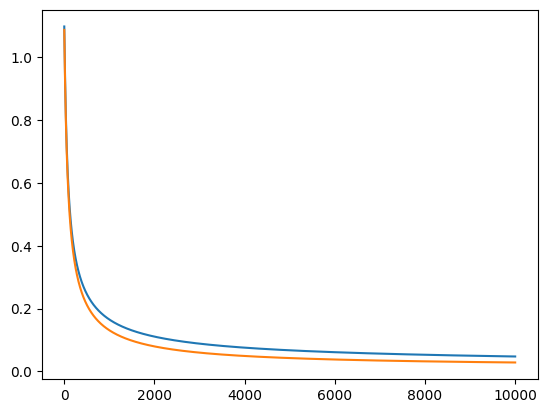

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Define the softmax function
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

# Define the cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

# Define the batch gradient descent function with early stopping
def batch_gradient_descent(X, y, learning_rate, max_iter, tol):
    n_samples, n_features = X.shape
    n_classes = len(np.unique(y))
    y_one_hot = np.eye(n_classes)[y]
    w = np.zeros((n_features, n_classes))
    b = np.zeros(n_classes)
    loss_history = []
    val_loss_history = []
    best_val_loss = float('inf')
    best_weights = None
    best_epoch = 0
    for epoch in range(max_iter):
        z = np.dot(X, w) + b
        y_pred = softmax(z)
        loss = cross_entropy_loss(y_one_hot, y_pred)
        loss_history.append(loss)
        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Loss = {loss}')
        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y_one_hot))
        db = (1 / n_samples) * np.sum(y_pred - y_one_hot, axis=0)
        w -= learning_rate * dw
        b -= learning_rate * db
        val_loss = cross_entropy_loss(np.eye(n_classes)[y_val], softmax(np.dot(X_val, w) + b))
        val_loss_history.append(val_loss)
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_weights = w
            best_epoch = epoch
        elif epoch - best_epoch >= tol:
            print(f'Early stopping after epoch {epoch}')
            break
    return best_weights, b, loss_history, val_loss_history

# Load the Penguins dataset
penguins = sns.load_dataset('penguins')

# Drop the missing values
penguins = penguins.dropna()

# Split the dataset into training and validation sets
X = penguins.drop(['species', 'island', 'sex'], axis=1).values
y = pd.Categorical(penguins['species']).codes
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Train the model with batch gradient descent and early stopping
learning_rate = 0.01
max_iter = 10000
tol = 10
w, b, loss_history, val_loss_history = batch_gradient_descent(X_train, y_train, learning_rate, max_iter, tol)

# Make predictions on the validation set
y_pred = np.argmax(softmax(np.dot(X_val, w) + b), axis=1)

# Calculate the accuracy score on the validation set
acc = accuracy_score(y_val, y_pred)
print(f'Accuracy = {acc}')

# Plot the loss history
import matplotlib.pyplot as plt
plt.plot(loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')


In [7]:
penguins 

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
4         3450.0  Female  
5         3650.0    Male  
..           ...     ...  
338       4925.0  Female  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[333 rows x 7 columns]

In [8]:
acc = accuracy_score(y_val, y_pred)
print(f'Accuracy = {acc}')

Accuracy = 1.0


In [9]:
# Load the Penguins dataset
penguins = sns.load_dataset('penguins')

# Drop the missing values
penguins = penguins.dropna()

# Split the dataset into training, validation, and test sets
X = penguins.drop(['species', 'island', 'sex'], axis=1).values
y = pd.Categorical(penguins['species']).codes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Train the model with batch gradient descent and early stopping on the training set
learning_rate = 0.01
max_iter = 10000
tol = 10
w, b, loss_history, val_loss_history = batch_gradient_descent(X_train, y_train, learning_rate, max_iter, tol)

# Make predictions on the validation set
y_pred_val = np.argmax(softmax(np.dot(X_val, w) + b), axis=1)

# Calculate the accuracy score on the validation set
acc_val = accuracy_score(y_val, y_pred_val)
print(f'Validation Accuracy = {acc_val}')

# Make predictions on the test set
y_pred_test = np.argmax(softmax(np.dot(X_test, w) + b), axis=1)

# Calculate the accuracy score on the test set
acc_test = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy = {acc_test}')


Epoch 0: Loss = 1.0986122886681096
Epoch 100: Loss = 0.5467998532262972
Epoch 200: Loss = 0.38663196771081465
Epoch 300: Loss = 0.30930509492642244
Epoch 400: Loss = 0.26226258746734266
Epoch 500: Loss = 0.23011737346054256
Epoch 600: Loss = 0.20655962153886032
Epoch 700: Loss = 0.188451468565615
Epoch 800: Loss = 0.1740356415110247
Epoch 900: Loss = 0.16224553255657492
Epoch 1000: Loss = 0.15239429366418406
Epoch 1100: Loss = 0.1440187898431546
Epoch 1200: Loss = 0.1367948929272918
Epoch 1300: Loss = 0.13048864645372005
Epoch 1400: Loss = 0.12492671626324457
Epoch 1500: Loss = 0.11997777939130812
Epoch 1600: Loss = 0.11554039684943047
Epoch 1700: Loss = 0.11153487620131496
Epoch 1800: Loss = 0.1078976696079761
Epoch 1900: Loss = 0.10457742916937163
Epoch 2000: Loss = 0.10153217285718924
Epoch 2100: Loss = 0.09872721137934612
Epoch 2200: Loss = 0.09613360689315885
Epoch 2300: Loss = 0.09372701019743852
Epoch 2400: Loss = 0.09148677169349494
Epoch 2500: Loss = 0.08939525334252715
Epoch 

#here's an example code for evaluating the model on a separate test set:

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Define the softmax function
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

# Define the cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

# Define the batch gradient descent function with early stopping
def batch_gradient_descent(X, y, learning_rate, max_iter, tol):
    n_samples, n_features = X.shape
    n_classes = len(np.unique(y))
    y_one_hot = np.eye(n_classes)[y]
    w = np.zeros((n_features, n_classes))
    b = np.zeros(n_classes)
    loss_history = []
    val_loss_history = []
    best_val_loss = float('inf')
    best_weights = None
    best_epoch = 0
    for epoch in range(max_iter):
        z = np.dot(X, w) + b
        y_pred = softmax(z)
        loss = cross_entropy_loss(y_one_hot, y_pred)
        loss_history.append(loss)
        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Loss = {loss}')
        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y_one_hot))
        db = (1 / n_samples) * np.sum(y_pred - y_one_hot, axis=0)
        w -= learning_rate * dw
        b -= learning_rate * db
        val_loss = cross_entropy_loss(np.eye(n_classes)[y_val], softmax(np.dot(X_val, w) + b))
        val_loss_history.append(val_loss)
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_weights = w
            best_epoch = epoch
        elif epoch - best_epoch >= tol:
            print(f'Early stopping after epoch {epoch}')
            break
    return best_weights, b, loss_history, val_loss_history

# Load the Penguins dataset
penguins = sns.load_dataset('penguins')

# Drop the missing values
penguins = penguins.dropna()

# Split the dataset into training, validation, and test sets
X = penguins.drop(['species', 'island', 'sex'], axis=1).values
y = pd.Categorical(penguins['species']).codes
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Train the model with batch gradient descent and early stopping
learning_rate = 0.01
max_iter = 10000
tol = 10
w, b, loss_history, val_loss_history = batch_gradient_descent(X_train, y_train, learning_rate, max_iter, tol)

# Make predictions on the validation set
y_pred_val = np.argmax(softmax(np.dot(X_val, w) + b), axis=1)

# Calculate the accuracy score on the validation set
acc_val = accuracy_score(y_val, y_pred_val)
print(f'. Accuracy on validation set = {acc_val}')
y_pred_test = np.argmax(softmax(np.dot(X_test, w) + b), axis=1)
acc_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy on test set = {acc_test}')


Epoch 0: Loss = 1.0986122886681096
Epoch 100: Loss = 0.5467998532262972
Epoch 200: Loss = 0.38663196771081465
Epoch 300: Loss = 0.30930509492642244
Epoch 400: Loss = 0.26226258746734266
Epoch 500: Loss = 0.23011737346054256
Epoch 600: Loss = 0.20655962153886032
Epoch 700: Loss = 0.188451468565615
Epoch 800: Loss = 0.1740356415110247
Epoch 900: Loss = 0.16224553255657492
Epoch 1000: Loss = 0.15239429366418406
Epoch 1100: Loss = 0.1440187898431546
Epoch 1200: Loss = 0.1367948929272918
Epoch 1300: Loss = 0.13048864645372005
Epoch 1400: Loss = 0.12492671626324457
Epoch 1500: Loss = 0.11997777939130812
Epoch 1600: Loss = 0.11554039684943047
Epoch 1700: Loss = 0.11153487620131496
Epoch 1800: Loss = 0.1078976696079761
Epoch 1900: Loss = 0.10457742916937163
Epoch 2000: Loss = 0.10153217285718924
Epoch 2100: Loss = 0.09872721137934612
Epoch 2200: Loss = 0.09613360689315885
Epoch 2300: Loss = 0.09372701019743852
Epoch 2400: Loss = 0.09148677169349494
Epoch 2500: Loss = 0.08939525334252715
Epoch 